In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [39]:
cust = pd.read_csv('Customers.csv')
transaction = pd.read_csv('Transactions.csv')

In [40]:
cust

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [41]:
transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate']) 
transaction['Date'] = transaction['TransactionDate'].dt.date
transaction['Time'] = transaction['TransactionDate'].dt.time
transaction = transaction.drop(columns = ['TransactionDate','Time'],axis=1)
transaction

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Date
0,T00001,C0199,P067,1,300.68,300.68,2024-08-25
1,T00112,C0146,P067,1,300.68,300.68,2024-05-27
2,T00166,C0127,P067,1,300.68,300.68,2024-04-25
3,T00272,C0087,P067,2,601.36,300.68,2024-03-26
4,T00363,C0070,P067,3,902.04,300.68,2024-03-21
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,1,459.86,459.86,2024-10-24
996,T00759,C0059,P037,3,1379.58,459.86,2024-06-04
997,T00922,C0018,P037,4,1839.44,459.86,2024-04-05
998,T00959,C0115,P037,2,919.72,459.86,2024-09-29


In [42]:
ctable = transaction.merge(cust[['CustomerID', 'Region']], on='CustomerID', how='left')
ctable

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Date,Region
0,T00001,C0199,P067,1,300.68,300.68,2024-08-25,Europe
1,T00112,C0146,P067,1,300.68,300.68,2024-05-27,Asia
2,T00166,C0127,P067,1,300.68,300.68,2024-04-25,Europe
3,T00272,C0087,P067,2,601.36,300.68,2024-03-26,South America
4,T00363,C0070,P067,3,902.04,300.68,2024-03-21,Europe
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,1,459.86,459.86,2024-10-24,South America
996,T00759,C0059,P037,3,1379.58,459.86,2024-06-04,North America
997,T00922,C0018,P037,4,1839.44,459.86,2024-04-05,North America
998,T00959,C0115,P037,2,919.72,459.86,2024-09-29,Asia


## Standardizing Data

In [43]:
le = LabelEncoder()
ctable['Region'] = le.fit_transform(ctable['Region'])

In [44]:
ctable

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Date,Region
0,T00001,C0199,P067,1,300.68,300.68,2024-08-25,1
1,T00112,C0146,P067,1,300.68,300.68,2024-05-27,0
2,T00166,C0127,P067,1,300.68,300.68,2024-04-25,1
3,T00272,C0087,P067,2,601.36,300.68,2024-03-26,3
4,T00363,C0070,P067,3,902.04,300.68,2024-03-21,1
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,1,459.86,459.86,2024-10-24,3
996,T00759,C0059,P037,3,1379.58,459.86,2024-06-04,2
997,T00922,C0018,P037,4,1839.44,459.86,2024-04-05,2
998,T00959,C0115,P037,2,919.72,459.86,2024-09-29,0


In [46]:
ctable[['Price', 'TotalValue','Quantity','Region']] = ctable[['Price', 'TotalValue','Quantity','Region']]

scaler = StandardScaler()
ctable[['Price', 'TotalValue','Quantity','Region']] = scaler.fit_transform(ctable[['Price', 'TotalValue','Quantity','Region']])

In [48]:
ctable

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Date,Region
0,T00001,C0199,P067,-1.375488,-0.789850,0.199948,2024-08-25,-0.561250
1,T00112,C0146,P067,-1.375488,-0.789850,0.199948,2024-05-27,-1.446503
2,T00166,C0127,P067,-1.375488,-0.789850,0.199948,2024-04-25,-0.561250
3,T00272,C0087,P067,-0.480571,-0.179825,0.199948,2024-03-26,1.209255
4,T00363,C0070,P067,0.414347,0.430200,0.199948,2024-03-21,-0.561250
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,-1.375488,-0.466903,1.331565,2024-10-24,1.209255
996,T00759,C0059,P037,0.414347,1.399041,1.331565,2024-06-04,0.324002
997,T00922,C0018,P037,1.309264,2.332014,1.331565,2024-04-05,0.324002
998,T00959,C0115,P037,-0.480571,0.466069,1.331565,2024-09-29,-1.446503


## PCA to select important features

In [80]:
feature_names = ['Price', 'TotalValue', 'Quantity', 'Region']
pca_components = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nPCA Components (Feature Contributions):")
print(pca_components)

most_contributing_features = pca_components.apply(lambda row: feature_names[np.argmax(np.abs(row))], axis=1)
print("\nMost Contributing Features for Each Component:")
print(most_contributing_features)


PCA Components (Feature Contributions):
        Price  TotalValue  Quantity    Region
PC1  0.539824    0.708804  0.454018  0.007326
PC2 -0.613168    0.003904  0.727909 -0.306854

Most Contributing Features for Each Component:
PC1    TotalValue
PC2      Quantity
dtype: object


## KMeans for clustering

In [82]:
kmeans = KMeans(n_clusters=3, random_state=42)
ctable['Cluster'] = kmeans.fit_predict(pca_features)

C:\Users\Ria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [84]:
db_index = davies_bouldin_score(pca_features, ctable['Cluster'])
print("\nDavies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.8249758141297573


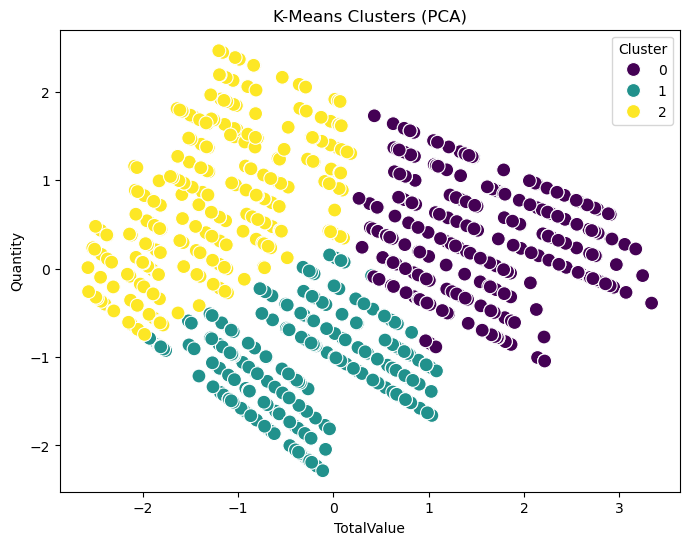

In [104]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=ctable['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

In [102]:
scores = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(ctable[['TotalValue', 'Quantity']])

    labels = kmeans.labels_

    db_index = davies_bouldin_score(ctable[['TotalValue', 'Quantity']], labels)
    scores.append(db_index)

C:\Users\Ria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

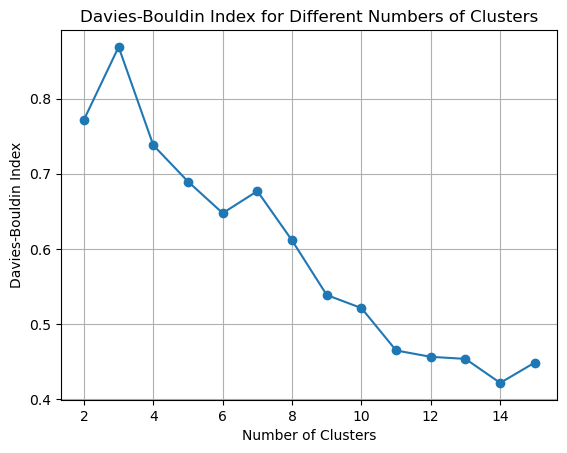

Davies-Bouldin Index scores: [0.7717768249632809, 0.8686222607433081, 0.7379051631059478, 0.6896222986718773, 0.647636446255631, 0.6769240590344746, 0.6113329679821704, 0.5387639233075884, 0.5214087151453348, 0.46506445840959915, 0.4565837900612175, 0.45385014143178454, 0.4218963084624436, 0.44899558270840434]


In [100]:
plt.plot(range(2, 16), scores, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid()
plt.show()
print("Davies-Bouldin Index scores:", scores)

In [106]:
kmeans = KMeans(n_clusters=14, random_state=42)
ctable['Cluster'] = kmeans.fit_predict(pca_features)

C:\Users\Ria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [108]:
db_index = davies_bouldin_score(pca_features, ctable['Cluster'])
print("\nDavies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.7725564701647574


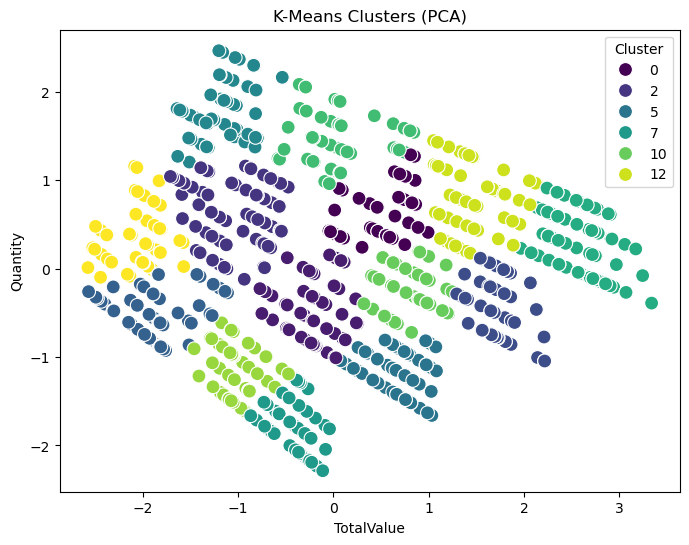

In [110]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=ctable['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

### Since the overview mentions to keep the clusters between 2-10 selecting 6 since DB index increases after 6

In [132]:
kmeans = KMeans(n_clusters=6, random_state=42)
ctable['Cluster'] = kmeans.fit_predict(pca_features)

C:\Users\Ria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [134]:
db_index = davies_bouldin_score(pca_features, ctable['Cluster'])
print("\nDavies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.825395291130218


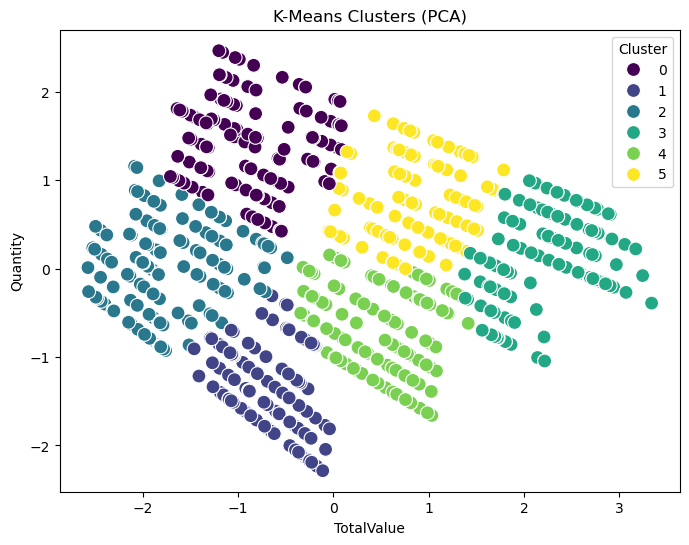

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=ctable['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()